In [1]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('data/birdclef-2021/train_metadata.csv')

# Drop rows without coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Preview
df.head(n=15)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129981
5,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-05,XC130056.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,07:45,https://www.xeno-canto.org/130056
6,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-12,XC130133.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,07:50,https://www.xeno-canto.org/130133
7,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-12,XC130140.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,14:00,https://www.xeno-canto.org/130140
8,acafly,[],"['call', 'song']",4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-12-02,XC130750.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:15,https://www.xeno-canto.org/130750
9,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2008-02-07,XC131193.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,17:10,https://www.xeno-canto.org/131193


In [ ]:
# Bounding box for Argentina (min_lat, max_lat, min_lon, max_lon)
latin_america_bounds = {
    'Argentina': (-57.0, 11, -80, -33)
}


In [25]:
from collections import defaultdict

country_species = defaultdict(set)

for _, row in df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    species = row['scientific_name']
    if latin_america_bounds['Argentina'][0] <= lat <= latin_america_bounds['Argentina'][1] and \
        latin_america_bounds['Argentina'][2] <= lon <= latin_america_bounds['Argentina'][3]:
        country_species['Argentina'].add(species)

print(f"Argentina: {len(country_species['Argentina'])}")


Argentina: 229


In [26]:
def in_argentina(lat, lon):
    min_lat, max_lat, min_lon, max_lon = latin_america_bounds['Argentina']
    return min_lat <= lat <= max_lat and min_lon <= lon <= max_lon

In [27]:
# Filter Argentina entries
df['country'] = df.apply(lambda row: 'Argentina' if in_argentina(row['latitude'], row['longitude']) else None, axis=1)
arg_df = df[df['country'].notna()][['primary_label', 'latitude', 'longitude', 'scientific_name']]

# Count occurrences per scientific_name
species_counts = arg_df['scientific_name'].value_counts().to_dict()
arg_df['amount_of_samples'] = arg_df['scientific_name'].map(species_counts)

# Save to CSV
arg_df.to_csv('argentina_species.csv', index=False)

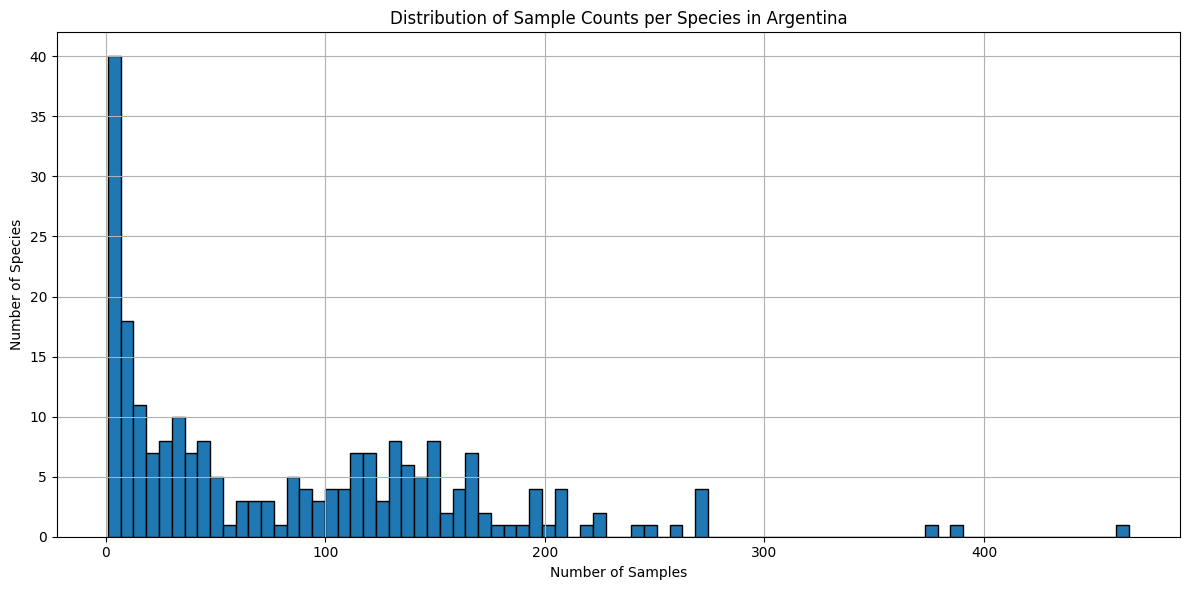

In [28]:
import matplotlib.pyplot as plt

# Count samples per species
species_counts = arg_df['scientific_name'].value_counts()

# Plot histogram
plt.figure(figsize=(12, 6))
species_counts.hist(bins=80, edgecolor='black')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Species')
plt.title('Distribution of Sample Counts per Species in Argentina')
plt.grid(True)
plt.tight_layout()
plt.show()

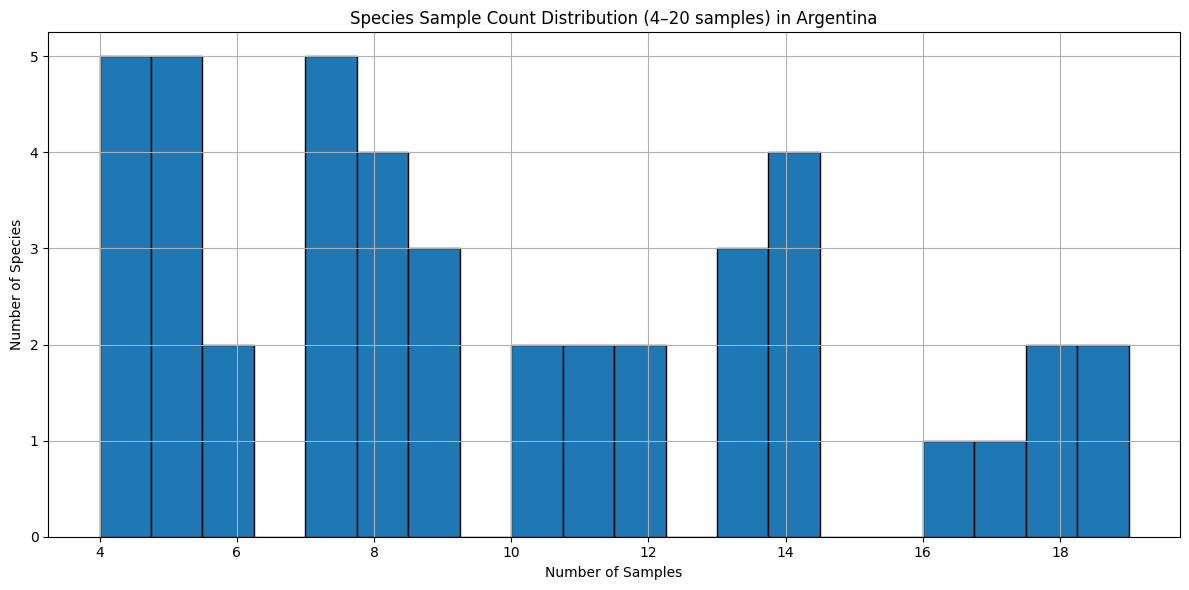

In [ ]:
# Filter species with more than 3 samples
species_counts_filtered = species_counts[species_counts > 3]
filtered_arg_df = arg_df[arg_df['scientific_name'].isin(species_counts_filtered.index)]

# Replot histogram limited to 0–20 samples
plt.figure(figsize=(12, 6))
species_counts_filtered[species_counts_filtered <= 20].hist(bins=20, edgecolor='black')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Species')
plt.title('Species Sample Count Distribution (4–20 samples) in Argentina')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Save to CSV
filtered_arg_df.to_csv('final_species_america.csv', index=False)

total_samples = len(filtered_arg_df)
total_species = filtered_arg_df['scientific_name'].nunique()

print(f"Total samples: {total_samples}")
print(f"Total distinct species: {total_species}")

Total samples: 18964
Total distinct species: 201
